<a href="https://colab.research.google.com/github/goflvhxj/CIFAR100-with-NoisyLabel/blob/main/pretrained%20model%20%26%20kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. dataset 생성**

### **1-1. 압축해제**

In [ ]:
# !unzip -uq "Yonsei-vnl-coding-assignment-vision-48hrs.zip" -d "Yonsei-vnl-coding-assignment-vision-48hrs"

In [ ]:
# 필요없는 폴더 삭제
import shutil
# shutil.rmtree('./Yonsei-vnl-coding-assignment-vision-48hrs')
# shutil.rmtree('./Yonsei-vnl-coding-assignment-vision-48hrs2')
# shutil.rmtree('../Yonsei-vnl-coding-assignment-vision-48hrs3')

### **1-2. 데이터 준비**

In [ ]:
import pandas as pd

columns = ['file_path', 'label']
all = pd.read_csv('./Yonsei-vnl-coding-assignment-vision-48hrs/dataset/data/cifar100_nl.csv', names=columns)
test = pd.read_csv('./Yonsei-vnl-coding-assignment-vision-48hrs/dataset/data/cifar100_nl_test.csv', names=columns)

# train label만 남김
dropna_train = all.dropna(axis=0)
dropna_train.head()

,file_path,label
0,cifar100_nl/img/train/zuLaSLzHKZ.png,cockroach
1,cifar100_nl/img/train/TIbrIzjlju.png,whale
2,cifar100_nl/img/train/bIbtjNbPvW.png,apple
3,cifar100_nl/img/train/vMsCEjUvde.png,seal
4,cifar100_nl/img/train/yyPVYpDWSd.png,sea


In [ ]:
dropna_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 0 to 49998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  49999 non-null  object
 1   label      49999 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [ ]:
train = dropna_train.sort_values(by=['file_path'])
test = test.sort_values(by=['file_path'])

In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 26291 to 21579
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  49999 non-null  object
 1   label      49999 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB
None


In [ ]:
print(train.head())
print(test.head())

                                  file_path        label
26291  cifar100_nl/img/train/AAAMhtuLlg.png    telephone
16926  cifar100_nl/img/train/AAEKhSzYjb.png         crab
26854  cifar100_nl/img/train/AAFmznqStg.png  willow_tree
24289  cifar100_nl/img/train/AAHSUlwrdk.png          sea
38649  cifar100_nl/img/train/AAHorghNrg.png    streetcar
                                file_path   label
9070  cifar100_nl/img/test/AAAskyGhWB.png  rabbit
7409  cifar100_nl/img/test/AAByKXraYf.png  cattle
5576  cifar100_nl/img/test/AAdUmVFbWd.png   otter
6568  cifar100_nl/img/test/AAjZvAvIkB.png     bus
5329  cifar100_nl/img/test/ABDJDuRwPn.png    seal


In [ ]:
import pandas as pd

# class별 갯수 확인
class_counts = train['label'].value_counts().to_dict()
print(class_counts)

# 클래스에 대한 숫자형 라벨을 생성
label_map = {name: i for i, (name, count) in enumerate(class_counts.items())}

# 매핑된 라벨을 확인
print(label_map)

{'pine_tree': 535, 'cockroach': 533, 'tiger': 532, 'shark': 528, 'hamster': 524, 'lizard': 522, 'beaver': 519, 'streetcar': 518, 'porcupine': 517, 'train': 516, 'snail': 516, 'mountain': 516, 'kangaroo': 515, 'boy': 515, 'elephant': 515, 'poppy': 512, 'pear': 512, 'plate': 511, 'cattle': 511, 'lobster': 510, 'fox': 510, 'television': 510, 'oak_tree': 510, 'squirrel': 509, 'woman': 509, 'camel': 509, 'sunflower': 508, 'bee': 507, 'bridge': 507, 'pickup_truck': 506, 'wardrobe': 506, 'shrew': 505, 'couch': 505, 'willow_tree': 504, 'road': 504, 'tractor': 504, 'keyboard': 504, 'clock': 503, 'seal': 502, 'apple': 502, 'can': 502, 'ray': 501, 'bus': 501, 'wolf': 501, 'leopard': 501, 'castle': 501, 'raccoon': 501, 'bottle': 500, 'maple_tree': 500, 'rabbit': 500, 'spider': 499, 'sea': 499, 'motorcycle': 499, 'chair': 498, 'lion': 497, 'bear': 497, 'dinosaur': 496, 'rocket': 496, 'crocodile': 496, 'otter': 495, 'cup': 495, 'sweet_pepper': 495, 'bed': 495, 'mushroom': 494, 'lawn_mower': 494, 'aq

In [ ]:
import os
from glob import glob

def get_train_data(data_dir):
    img_path_list = []
    label_list = []
    
    # get image path
    img_path_list.extend(glob(os.path.join(data_dir, '*.png')))
    img_path_list.sort(key=lambda x:(x.split('/')[-1].split('.')[0]))
        
    # get label
    label_list.extend(train['label'])
                
    return img_path_list, label_list

def get_test_data(data_dir):
    img_path_list = []
    label_list = []
    
    # get image path
    img_path_list.extend(glob(os.path.join(data_dir, '*.png')))
    img_path_list.sort(key=lambda x:(x.split('/')[-1].split('.')[0]))
    #print(img_path_list)

    # get label
    label_list.extend(test['label'])
    
    return img_path_list, label_list

In [ ]:
train_img_path, train_label = get_train_data('./Yonsei-vnl-coding-assignment-vision-48hrs/dataset/cifar100_nl/img/train')
test_img_path, test_label = get_test_data('./Yonsei-vnl-coding-assignment-vision-48hrs/dataset/cifar100_nl/img/test')

In [ ]:
print(train_img_path[:5])
print(train_label[:5])
print(test_img_path[:5])
print(test_label[:5])
print(len(train_img_path))
print(len(train_label))
print(len(test_img_path))
print(len(test_label))

['./Yonsei-vnl-coding-assignment-vision-48hrs/dataset/cifar100_nl/img/train/AAAMhtuLlg.png', './Yonsei-vnl-coding-assignment-vision-48hrs/dataset/cifar100_nl/img/train/AAEKhSzYjb.png', './Yonsei-vnl-coding-assignment-vision-48hrs/dataset/cifar100_nl/img/train/AAFmznqStg.png', './Yonsei-vnl-coding-assignment-vision-48hrs/dataset/cifar100_nl/img/train/AAHSUlwrdk.png', './Yonsei-vnl-coding-assignment-vision-48hrs/dataset/cifar100_nl/img/train/AAHorghNrg.png']
['telephone', 'crab', 'willow_tree', 'sea', 'streetcar']
['./Yonsei-vnl-coding-assignment-vision-48hrs/dataset/cifar100_nl/img/test/AAAskyGhWB.png', './Yonsei-vnl-coding-assignment-vision-48hrs/dataset/cifar100_nl/img/test/AAByKXraYf.png', './Yonsei-vnl-coding-assignment-vision-48hrs/dataset/cifar100_nl/img/test/AAdUmVFbWd.png', './Yonsei-vnl-coding-assignment-vision-48hrs/dataset/cifar100_nl/img/test/AAjZvAvIkB.png', './Yonsei-vnl-coding-assignment-vision-48hrs/dataset/cifar100_nl/img/test/ABDJDuRwPn.png']
['rabbit', 'cattle', 'otte

### **1-3. object label int형으로 변환**

In [ ]:
# object형태의 label을 int형으로 변환
labels = train_label
map_train_labels = [label_map[label] for label in labels]
print(map_train_labels)

labels2 = test_label
map_test_labels = [label_map[label] for label in labels2]
print(map_test_labels)

[84, 86, 33, 51, 7, 49, 31, 51, 66, 53, 30, 68, 81, 74, 19, 70, 26, 74, 63, 84, 6, 94, 33, 43, 40, 91, 96, 52, 22, 70, 27, 98, 42, 9, 23, 30, 66, 98, 52, 33, 3, 57, 25, 62, 69, 67, 84, 56, 14, 45, 30, 58, 12, 8, 83, 33, 1, 86, 24, 42, 5, 18, 76, 26, 39, 29, 81, 76, 34, 41, 37, 39, 65, 7, 10, 60, 11, 80, 51, 12, 99, 13, 8, 0, 91, 11, 65, 90, 96, 16, 55, 67, 90, 50, 98, 70, 5, 1, 52, 98, 41, 44, 98, 37, 70, 48, 0, 6, 54, 47, 47, 75, 8, 65, 82, 81, 60, 65, 15, 7, 20, 74, 94, 28, 21, 5, 88, 9, 69, 7, 46, 61, 83, 98, 53, 42, 40, 25, 69, 72, 41, 95, 86, 83, 41, 42, 22, 48, 30, 58, 92, 39, 6, 82, 32, 60, 99, 82, 12, 96, 85, 31, 44, 54, 53, 29, 20, 31, 12, 34, 2, 61, 31, 51, 23, 92, 91, 27, 45, 48, 95, 35, 95, 53, 39, 6, 86, 0, 51, 32, 83, 41, 92, 58, 88, 99, 15, 19, 92, 32, 74, 25, 50, 89, 72, 30, 75, 56, 74, 9, 44, 44, 52, 41, 12, 21, 22, 41, 6, 99, 61, 20, 43, 30, 67, 1, 8, 95, 48, 17, 37, 13, 97, 88, 99, 71, 31, 73, 52, 83, 3, 10, 55, 25, 32, 68, 36, 22, 30, 89, 24, 34, 95, 77, 22, 89, 81,

### **1-4. GPU 환경설정**

In [ ]:
import torch
import torch.nn as nn

# os.environ["TOKENIZERS_PARALLELISM"] = 'false'
# os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
# os.environ["CUDA_VISIBLE_DEVICES"] = '2'

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
# GPU 체크 및 할당
if torch.cuda.is_available():
  print('Device:', device)
  print("There are %d GPU(s) available." % torch.cuda.device_count())
  print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
  device = torch.device("cpu")
  print('No GPU available, using the CPU instead.')

Device: cuda
There are 1 GPU(s) available.
We will use the GPU: NVIDIA A100 80GB PCIe


### **1-5. 하이퍼 파라미터**

In [ ]:
CFG = { 
    'IMG_SIZE':224,
    'EPOCHS':50,
    'LR':0.1,
    'BATCH_SIZE':16,
    'SEED':41,
    'NUM_CLASSES':100,
}

In [ ]:
# Seed 고정
import random
import numpy as np

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(CFG['SEED'])

## **2. 데이터 전처리**

### **2-1. class 생성**

In [ ]:
import torchvision.datasets as datasets # 이미지 데이터셋 집합체
import torchvision.transforms as transforms # 이미지 변환 툴

from torch.utils.data import DataLoader # 학습 및 배치로 모델에 넣어주기 위한 툴
from torch.utils.data import DataLoader, Dataset

import cv2

class C100Dataset(Dataset):
    def __init__(self, img_path_list, label_list, train_mode=True, transforms=None): #필요한 변수들을 선언
        self.transforms = transforms
        self.train_mode = train_mode
        self.img_path_list = img_path_list
        self.label_list = label_list

    def __getitem__(self, index): #index번째 data를 return
        img_path = self.img_path_list[index]
        # Get image data
        #print(img_path)
        image = cv2.imread(img_path)
        if self.transforms is not None:
            image = self.transforms(image)

        if self.train_mode:
            label = self.label_list[index]
            return image, label
        else:
            return image
    
    def __len__(self): #길이 return
        return len(self.img_path_list)

### **2-2. dataset 생성 확인 위한 임시 이미지 추출**

In [ ]:
tempdataset = C100Dataset(train_img_path, train_label, train_mode = False)

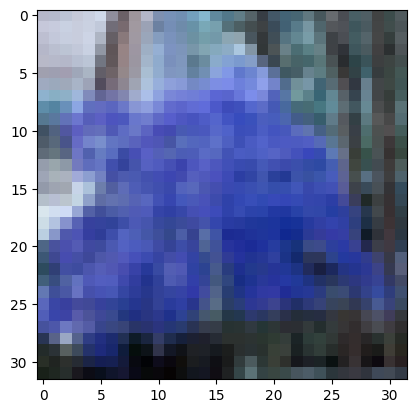

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(tempdataset.__getitem__(4000))

### **2-3. transform**

In [ ]:
train_transform = transforms.Compose([
                    transforms.ToPILImage(), # Numpy배열에서 PIL이미지로
                    transforms.Resize([CFG['IMG_SIZE'], CFG['IMG_SIZE']]), # 이미지 사이즈 변형
                    transforms.RandomHorizontalFlip(),
                    transforms.ToTensor(), # 이미지 데이터를 tensor
                    transforms.Normalize(mean=(0.4409, 0.4865, 0.5070), std=(0.2761, 0.2564, 0.2673)) # 이미지 정규화
                    ])
""
test_transform = transforms.Compose([
                    transforms.ToPILImage(),
                    transforms.Resize([CFG['IMG_SIZE'], CFG['IMG_SIZE']]),
                    transforms.CenterCrop(224),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=(0.4417, 0.4871, 0.5086), std=(0.2770, 0.2573, 0.2682))
                    ])

In [ ]:
# Normalize위한 mean, std 구하기

# test_dataset = C100Dataset(test_img_path, map_test_labels, train_mode=True, transforms=transforms.ToTensor())
# test_loader = DataLoader(test_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=False, num_workers=0)

In [ ]:
# mean, std 계산

# def get_mean_and_std(train_loader):
#     channels_sum, channels_squared_sum, num_batches = 0, 0, 0
#     for data, _ in train_loader:
#         # Mean over batch, height and width, but not over the channels
#         channels_sum += torch.mean(data, dim=[0,2,3])
#         channels_squared_sum += torch.mean(data**2, dim=[0,2,3])
#         num_batches += 1
    
#     mean = channels_sum / num_batches

#     # std = sqrt(E[X^2] - (E[X])^2)
#     std = (channels_squared_sum / num_batches - mean ** 2) ** 0.5

#     return mean, std

In [ ]:
# get_mean_and_std(test_loader)

### **2-4. DataLoader**

In [ ]:
train_dataset = C100Dataset(train_img_path, map_train_labels, train_mode=True, transforms=train_transform) 
train_loader = DataLoader(train_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=True, num_workers=0)

test_dataset = C100Dataset(test_img_path, map_test_labels, train_mode=True, transforms=test_transform)
test_loader = DataLoader(test_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=False, num_workers=0)

In [ ]:
train_batches = len(train_loader)
test_batches = len(test_loader)

print('total train imgs :', len(train_img_path),'/ total train batches :', train_batches)
print('total test imgs :', len(test_img_path), '/ total test batches :', test_batches)

total train imgs : 49999 / total train batches : 3125
total test imgs : 9999 / total test batches : 625


## **3. Model 생성**

### **3-1. Pretrained Resnet50**

In [ ]:
from torchvision import models

# resnet50_pretrained = models.resnet50(pretrained=True).to(device) # true 옵션으로 사전 학습된 모델을 로드

In [ ]:
# fc layer 출력 노드 개수를 num_ftrs에 저장
# num_ftrs = resnet50_pretrained.fc.in_features
# # FC layer를 class = 100으로 설정
# resnet50_pretrained.fc = nn.Linear(num_ftrs, CFG['NUM_CLASSES'])

# device=torch.device('cuda:0')
# resnet50_pretrained.to(device)

In [ ]:
# 모델 요약본 확인
# from torchsummary import summary

# summary(resnet50_pretrained, (3, 224, 224))

pretrained model 가져왔으나 1 epoch당 10시간 소요되어 부적합

### **3-2. Pretrained Resnet18**

In [ ]:
from torchvision import models

resnet18_pretrained = models.resnet18(pretrained=False).to(device) # true 옵션으로 사전 학습된 모델을 로드
print(resnet18_pretrained)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# fc layer 출력 노드 개수를 num_ftrs에 저장
num_ftrs = resnet18_pretrained.fc.in_features
# FC layer를 class = 100으로 설정
resnet18_pretrained.fc = nn.Linear(num_ftrs, CFG['NUM_CLASSES'])

device=torch.device('cuda:0')
resnet18_pretrained.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# 모델 요약본 확인
from torchsummary import summary

summary(resnet18_pretrained, input_size = (3, 224, 224), device=device.type)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

마찬가지로 1 epoch당 8시간 소요되어 부적합

### **3-3. Resnet18 구현**

In [ ]:
import torch.nn.functional as F

class BasicBlock(nn.Module):
    mul = 1
    def __init__(self, in_planes, out_planes, stride=1):
        super(BasicBlock, self).__init__()
        
        # stride를 통해 너비와 높이 조정
        self.conv1 = nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_planes)
        
        # stride = 1, padding = 1이므로, 너비와 높이는 항시 유지됨
        self.conv2 = nn.Conv2d(out_planes, out_planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_planes)
        
        # x를 그대로 더해주기 위함
        self.shortcut = nn.Sequential()
        
        # 만약 size가 안맞아 합연산이 불가하다면, 연산 가능하도록 모양을 맞춰줌
        if stride != 1:  
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_planes)
            )
        
        self.dropout = nn.Dropout(0.25)
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = F.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.shortcut(x) # 필요에 따라 layer를 Skip
        out = F.relu(out)
        out = F.dropout(out, p=0.25)
        return out

In [ ]:
import torch.nn.functional as F

class ResNet(nn.Module):
	# CIFAR-100을 학습시킬 것이므로, num_classes=100으로 설정
    def __init__(self, block, num_blocks, num_classes=100):
        super(ResNet, self).__init__()
        #RGB 3개채널에서 64개의 Kernel 사용 (논문 참고)
        self.in_planes = 64
        
        # Resnet 논문 구조의 conv1 파트 그대로 구현
        self.conv1 = nn.Conv2d(3, self.in_planes, kernel_size=7, stride=2, padding = 3)
        self.bn1 = nn.BatchNorm2d(self.in_planes)
        self.maxpool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        self.layer1 = self.make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self.make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self.make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self.make_layer(block, 512, num_blocks[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        
        # Basic Resiudal Block일 경우 그대로, BottleNeck일 경우 4를 곱한다.
        self.linear = nn.Linear(512 * block.mul, num_classes)
        self.dropout = nn.Dropout(0.25)
        
        
    # 다양한 Architecture 생성을 위해 make_layer로 Sequential 생성     
    def make_layer(self, block, out_planes, num_blocks, stride):
        # layer 앞부분에서만 크기를 절반으로 줄이므로, 아래와 같은 구조
        strides = [stride] + [1] * (num_blocks-1)
        layers = []
        for i in range(num_blocks):
            layers.append(block(self.in_planes, out_planes, strides[i]))
            self.in_planes = block.mul * out_planes
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = F.relu(out)
        out = self.maxpool1(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avgpool(out)
        out = torch.flatten(out,1)
        out = F.dropout(out, p=0.25)
        out = self.linear(out)
        return out
    
def ResNet18():
    return ResNet(BasicBlock, [2,2,2,2])

In [ ]:
# from torchsummary import summary

# model = ResNet18().cuda()
# summary(model, (3,224,224), device=device.type)
# print(model)

In [ ]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model3 = ResNet18().to(device)
# x = torch.randn(3, 3, 224, 224).to(device)
# output = model3(x)
# print(output.size())

In [ ]:
# from torchsummary import summary
# summary(model3, (3, 224, 224), device=device.type)

In [ ]:
# import torch
# import torch.nn as nn
# from torch import optim

# optimizer = optim.Adam(model3.parameters(), lr=CFG['LR'])
# loss_function = nn.CrossEntropyLoss().to(device)

### **3-4. train**

In [ ]:
from tqdm import tqdm
import time

# Train function 
def train(model, optimizer, loss_function):  
    model.train()
    correct = 0
    total = 0
    train_loss = 0.0
    
    for i, (inputs, labels) in tqdm(enumerate(train_loader)):
        optimizer.zero_grad()
        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward + backward + optimize
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = train_loss / len(train_loader)
    train_acc = 100 * correct / total

    # model 반환 안해주면 학습시킨 model이 아닌 아무것도 안한 처음 모델로 validation 학습시키는 것
    return model, train_loss, train_acc

### **3-5. val**

In [ ]:
# Validation function
def validate(model, loss_function):
    model.eval()    
    correct = 0
    total = 0
    val_loss = 0.0
    
    with torch.no_grad():
        for i, (images, labels) in tqdm(enumerate(test_loader)):
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = loss_function(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(test_loader)
        val_acc = 100 * correct / total

    return val_loss, val_acc

### **3-7. Experiment**

In [ ]:
import torch.nn.functional as F

def linear_combination(x, y, epsilon):
    return epsilon * x + (1 - epsilon) * y


def reduce_loss(loss, reduction='mean'):
    return loss.mean() if reduction == 'mean' else loss.sum() if reduction == 'sum' else loss


class LabelSmoothingCrossEntropy(nn.Module):
    def __init__(self, epsilon: float = 0.1, reduction='mean'):
        super().__init__()
        self.epsilon = epsilon
        self.reduction = reduction

    def forward(self, preds, target):
        n = preds.size()[-1]
        log_preds = F.log_softmax(preds, dim=-1)
        loss = reduce_loss(-log_preds.sum(dim=-1), self.reduction)
        nll = F.nll_loss(log_preds, target, reduction=self.reduction)
        return linear_combination(loss / n, nll, self.epsilon)

In [ ]:
import torch
import torch.nn as nn
from torch import optim

# Experiment function
def experiment():
    model = ResNet18().to(device)
#     model = resnet50_pretrained
    checkpoint = torch.load('./model/Renet18_epoch_40.ckpt')
    model.load_state_dict(checkpoint)
    
    optimizer = optim.SGD(model.parameters(), lr=CFG['LR'])
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 50, gamma = 0.1)
    
#     loss_function = nn.CrossEntropyLoss().to(device)
    loss_function = LabelSmoothingCrossEntropy(reduction='sum')

    # =========== List for epoch-wise data ============= #
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    # =========== Experiment ============= #
    for epoch in range(CFG['EPOCHS']):
        ts = time.time()
        model, train_loss, train_acc = train(model, optimizer, loss_function)
        val_loss, val_acc = validate(model, loss_function)
        te = time.time()

        # ========== Add Epoch Data ============ #
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)


        print('Epoch {}, Acc(train/val): {:2.2f}/{:2.2f}, Loss(train/val) {:2.2f}/{:2.2f}. Took {:2.2f} sec'.format(epoch+1, train_acc, val_acc, train_loss, val_loss, te-ts))
        
        # save model for each epochs
        if (epoch+1) % 1 == 0:
            torch.save(model.state_dict(), f'./model/Renet18_epoch_{epoch+41}.ckpt')
        

    # ======== Add Result to Dictionary ========== #
    result = {}
    result['train_losses'] = train_losses
    result['val_losses'] = val_losses
    result['train_accs'] = train_accs
    result['val_accs'] = val_accs
    result['train_acc'] = train_acc
    result['val_acc'] = val_acc

    return result

In [ ]:
def save_exp_result(result):
    filename = f'./results/resnet18.json'
    with open(filename, 'w') as f:
        json.dump(result, f)

In [ ]:
result = experiment()
save_exp_result(result)

### **3-7. Train vs Test Accuracy Plot**

In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(result['train_accs'],'-o')
# plt.plot(result['val_accs'],'-o')
# plt.xlabel('epoch')
# plt.ylabel('accuracy')
# plt.legend(['Train','Test'])
# plt.title('Train vs Test Accuracy')

# plt.show()

## **4. 이상치 탐지** 

### **4-1. k-means**

In [ ]:
from tqdm import tqdm
from PIL import Image,ImageFilter
import cv2
import os
import glob
import numpy as np
import pandas as pd

In [ ]:
all_df = pd.read_csv("./Yonsei-vnl-coding-assignment-vision-48hrs/dataset/data/cifar100_nl.csv", names = ['file_path', 'label'])
train_df = all_df.dropna(axis=0)
label_list = train_df["label"].unique().tolist()
print(len(label_list))

100


In [ ]:
train_folder = os.listdir('./Yonsei-vnl-coding-assignment-vision-48hrs/dataset/cifar100_nl/img/train/apple')
len(train_folder)

502

In [ ]:
label_list

['cockroach',
 'whale',
 'apple',
 'seal',
 'sea',
 'train',
 'squirrel',
 'tank',
 'wardrobe',
 'worm',
 'tiger',
 'clock',
 'possum',
 'palm_tree',
 'couch',
 'orchid',
 'elephant',
 'bridge',
 'bus',
 'skunk',
 'girl',
 'chair',
 'spider',
 'otter',
 'aquarium_fish',
 'maple_tree',
 'skyscraper',
 'rabbit',
 'orange',
 'willow_tree',
 'butterfly',
 'bed',
 'lobster',
 'ray',
 'lion',
 'telephone',
 'porcupine',
 'fox',
 'shark',
 'hamster',
 'woman',
 'streetcar',
 'oak_tree',
 'pear',
 'can',
 'raccoon',
 'rose',
 'pine_tree',
 'beetle',
 'boy',
 'shrew',
 'bottle',
 'house',
 'table',
 'tulip',
 'beaver',
 'cloud',
 'plate',
 'kangaroo',
 'lawn_mower',
 'road',
 'caterpillar',
 'sweet_pepper',
 'sunflower',
 'plain',
 'lamp',
 'trout',
 'flatfish',
 'snake',
 'camel',
 'mountain',
 'motorcycle',
 'baby',
 'crocodile',
 'leopard',
 'mushroom',
 'cattle',
 'wolf',
 'snail',
 'dolphin',
 'cup',
 'turtle',
 'keyboard',
 'pickup_truck',
 'chimpanzee',
 'tractor',
 'bee',
 'bear',
 'for

### **4-2. 모든 class의 이상치 제거**

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# import os

# for label in label_list[3:]:
#     # class별 path 저장
#     train_img_path = glob.glob(f'./Yonsei-vnl-coding-assignment-vision-48hrs/dataset/cifar100_nl/img/train/{label}/*')
# #     print(len(train_img_path))

#     cifar100 = []

#     for i in tqdm(range(len(train_img_path))):
#         cifar100.append(cv2.imread(train_img_path[i], cv2.IMREAD_GRAYSCALE))
        
#     # 32*32의 이미지를 4999 * (32*32)로 펼침
#     cifar100_2d = np.array(cifar100).reshape(-1, 32*32)
#     cifar100_2d = cifar100_2d/255

#     km = KMeans(n_clusters=2, random_state = 0).fit(cifar100_2d)
#     distances = km.transform(cifar100_2d)

#     # 임계값은 거리 값에서 상위 5%인 값
#     threshold = np.percentile(distances, 95)

#     # 이상치 데이터
#     outliers = cifar100_2d[np.max(distances, axis=1) > threshold]

#     # 이상치 데이터의 인덱스 값을 index 배열에 저장
#     index = []
#     for i in range(len(outliers)):
#         outliers_index = np.argwhere((cifar100_2d == outliers[i]).all(axis=1))[0][0]
#         index.append(outliers_index)
        
        
#     # outliers에 존재하는 인덱스의 경로를 outliers_path에 저장
#     outliers_path = []
#     for i in index:
#         outliers_path.append(train_img_path[i])
        
        
#     # outliers 이미지 삭제
#     for path in tqdm(outliers_path):
#         os.remove(path)
        
# # 폴더 별 이미지 개수
# clean_path = glob.glob(f'./Yonsei-vnl-coding-assignment-vision-48hrs/dataset/cifar100_nl/img/train/{label}/*')
# print(len(clean_path))

100%|██████████| 50/50 [00:00<00:00, 38332.15it/s]


441


In [ ]:
# 모든 image 크기 (32, 32, 1)

cifar100 = []

for i in tqdm(range(len(train_img_path))):
    cifar100.append(cv2.imread(train_img_path[i], cv2.IMREAD_GRAYSCALE))

100%|██████████| 502/502 [00:00<00:00, 8552.92it/s]


In [ ]:
from sklearn.preprocessing import StandardScaler
# 32*32의 이미지를 4999 * (32*32)로 펼침

cifar100_2d = np.array(cifar100).reshape(-1, 32*32)
cifar100_2d = cifar100_2d/255
# scaler = StandardScaler()
# cifar100_2d = scaler.fit_transform(cifar100_2d)

print(cifar100_2d.shape)
print(cifar100_2d)

(502, 1024)
[[0.31764706 0.21960784 0.40392157 ... 0.34117647 0.3254902  0.34901961]
 [0.35686275 0.38039216 0.30588235 ... 0.31372549 0.33333333 0.19215686]
 [0.81568627 0.80784314 0.81176471 ... 0.78431373 0.78823529 0.78823529]
 ...
 [1.         1.         1.         ... 0.9372549  0.96078431 0.99607843]
 [0.14117647 0.1254902  0.12941176 ... 0.05098039 0.07058824 0.07843137]
 [0.50980392 0.49803922 0.49019608 ... 0.51372549 0.5254902  0.5372549 ]]


In [ ]:
# 실루엣 점수 계산
# from sklearn.metrics import silhouette_score
# silhouette_score(cifar100_2d, km.labels_)

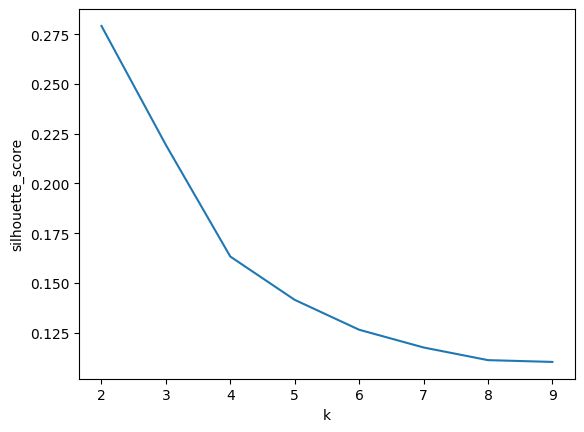

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, init = 'k-means++', random_state = 42)
    km.fit(cifar100_2d)
    labels = km.labels_
    score = silhouette_score(cifar100_2d, labels)
    silhouette.append(score)
    
plt.plot(range(2,10), silhouette)
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state = 0).fit(cifar100_2d)
distances = km.transform(cifar100_2d)

# 임계값은 거리 값에서 상위 5%인 값
threshold = np.percentile(distances, 95)

# 이상치 제거한 데이터
clean_data = cifar100_2d[np.max(distances, axis=1) <= threshold]

# 이상치 데이터
outliers = cifar100_2d[np.max(distances, axis=1) > threshold]

# 이상치 데이터의 인덱스 값을 index 배열에 저장
index = []
for i in range(len(outliers)):
    outliers_index = np.argwhere((cifar100_2d == outliers[i]).all(axis=1))[0][0]
    index.append(outliers_index)

print(cifar100_2d.shape)
print(index)
print(len(index))

# print(len(clean_data))
# print(len(outliers))
# print(outliers.shape)
# print(outliers[0])
# print(clean_data.shape)

(502, 1024)
[35, 36, 37, 40, 61, 68, 71, 82, 86, 104, 110, 114, 125, 127, 129, 131, 147, 162, 203, 220, 226, 233, 247, 268, 278, 289, 297, 298, 304, 318, 319, 333, 347, 358, 368, 374, 375, 378, 381, 385, 405, 411, 439, 443, 452, 453, 457, 458, 476, 497, 500]
51


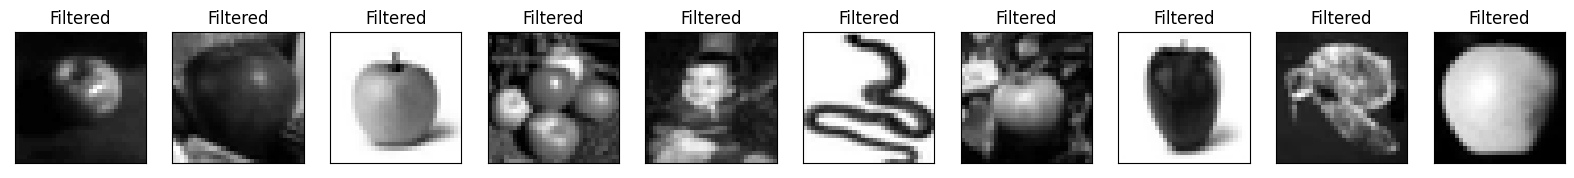

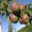

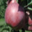

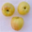

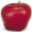

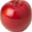

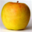

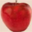

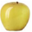

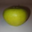

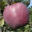

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
 
# 이상치 제거된 이미지 시각화
n=10
plt.figure(figsize=(20,4))
for i in range(n):    
    # 이상치 이미지
    ax = plt.subplot(2,n,i+n+1)
    plt.imshow(outliers[i].reshape(32,32))
    plt.title('Filtered')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()


for i in range(n):
    # 원본 이미지
#     ax = plt.subplot(2,n,i+1)
    im = Image.open(train_img_path[index[i]])
    im.show()
#     plt.title('Original')
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.show()    


In [ ]:
print(index)

[35, 36, 37, 40, 61, 68, 71, 82, 86, 104, 110, 114, 125, 127, 129, 131, 147, 162, 203, 220, 226, 233, 247, 268, 278, 289, 297, 298, 304, 318, 319, 333, 347, 358, 368, 374, 375, 378, 381, 385, 405, 411, 439, 443, 452, 453, 457, 458, 476, 497, 500]


In [ ]:
# outliers에 존재하는 인덱스의 경로를 outliers_path에 저장

outliers_path = []
for i in index:
    outliers_path.append(train_img_path[i])
    
print(len(index))
print(len(outliers_path))
# print(outliers_path)

51
51


In [ ]:
# outliers 이미지 삭제

import os

for path in tqdm(outliers_path):
    os.remove(path)

100%|██████████| 51/51 [00:00<00:00, 19262.45it/s]


In [ ]:
# apple 폴더 안 이미지 개수
path = './Yonsei-vnl-coding-assignment-vision-48hrs/dataset/cifar100_nl/img/train/apple'
print(len(os.listdir(path)))

451


In [ ]:
import matplotlib.pyplot as plt
# 이상치 제거된 이미지 시각화
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    # 원본 이미지
    ax = plt.subplot(2,n,i+1)
    plt.imshow(cifar100_2d[i].reshape(3,32,32))
    plt.title('Original')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # 이상치 제거된 이미지
    ax = plt.subplot(2,n,i+n+1)
    plt.imshow(clean_data[i].reshape(32,32,3))
    plt.title('Filtered')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [ ]:
print(train_img_path[:5])
print(map_train_labels[:5])

In [ ]:
# noise 제거된 데이터셋 생성

train_dataset = C100Dataset(train_img_path, map_train_labels, train_mode=True, transforms=train_transform) 
train_loader = DataLoader(train_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=True, num_workers=0)

test_dataset = C100Dataset(test_img_path, map_test_labels, train_mode=True, transforms=test_transform)
test_loader = DataLoader(test_dataset, batch_size = CFG['BATCH_SIZE'], shuffle=False, num_workers=0)